### 1) В среде Google Colab создали новый блокнот (notebook). Импортировали необходимые для работы библиотеки и модули.

In [23]:
# импорт модулей
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


### 2) Загрузили набор данных IMDb, содержащий оцифрованные отзывы на фильмы, размеченные на два класса: позитивные и негативные. При загрузке набора данных параметр seed выбрали равным значению (4k – 1)=3, где k=1 – номер бригады. Вывели размеры полученных обучающих и тестовых массивов данных.

In [24]:
# загрузка датасета
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import imdb

vocabulary_size = 5000
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=vocabulary_size,
    skip_top=0,
    maxlen=None,
    seed=3,
    start_char=1,
    oov_char=2,
    index_from=index_from
    )

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


### 3) Вывели один отзыв из обучающего множества в виде списка индексов слов. Преобразовали список индексов в текст и вывели отзыв в виде текста. Вывели длину отзыва. Вывели метку класса данного отзыва и название класса (1 – Positive, 0 – Negative).

In [25]:
# создание словаря для перевода индексов в слова
# загрузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

In [26]:
print(X_train[26])
print('len:',len(X_train[26]))

[1, 37, 1388, 4, 2739, 495, 94, 96, 143, 49, 2, 875, 551, 19, 195, 2210, 5, 1698, 8, 401, 4, 65, 24, 64, 1728, 21, 400, 642, 45, 77, 6, 137, 237, 207, 258, 141, 6, 1562, 1301, 1562, 737, 22, 10, 10, 4, 22, 9, 1490, 3862, 4, 744, 19, 307, 1385, 5, 2, 2, 4, 2, 2656, 2, 1669, 19, 4, 1074, 200, 4, 55, 406, 55, 3048, 5, 246, 55, 1451, 105, 688, 8, 4, 321, 177, 32, 677, 7, 4, 678, 1850, 26, 1669, 221, 5, 3921, 10, 10, 13, 386, 37, 1388, 4, 2739, 45, 6, 66, 163, 20, 15, 304, 6, 3049, 168, 33, 4, 4352, 15, 75, 70, 2, 23, 257, 85, 5, 4, 2789, 878, 21, 1305, 2, 1773, 7, 2]
len: 130


In [27]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

# вывод метки класса и названия класса
print('Label:', y_train[26])
print('Class:', 'Positive' if y_train[26] == 1 else 'Negative')

<START> who loves the sun works its way through some <UNK> subject matter with enough wit and grace to keep the story not only engaging but often hilarious it's been a while since i've found such a thoroughly touching thoroughly enjoyable film br br the film is gorgeous drawing the eye with beautiful scenery and <UNK> <UNK> the <UNK> imagery <UNK> wonderfully with the tension between the very human very flawed and yet very likable characters due to the excellent cast all five of the major players are wonderfully interesting and dynamic br br i recommend who loves the sun it's a really funny movie that takes a poignant look at the hurts that we can <UNK> on each other and the amazingly difficult but equally <UNK> process of <UNK>
len: 738
Label: 1
Class: Positive


### 4) Вывели максимальную и минимальную длину отзыва в обучающем множестве.

In [28]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  2494
MIN Len:  11


### 5) Провели предобработку данных. Выбрали единую длину, к которой будут приведены все отзывы. Короткие отзывы дополнили спецсимволами, а длинные обрезали до выбранной длины.

In [29]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

### 6) Повторили пункт 4.

In [30]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  500
MIN Len:  500


### 7) Повторили пункт 3. Сделали вывод о том, как отзыв преобразовался после предобработки.

In [31]:
print(X_train[26])
print('len:',len(X_train[26]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [32]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

#### В результате предобработки данных все отзывы были приведены к единой длине 500 токенов. Для отзывов, исходная длина которых была меньше 500, в начало последовательности были добавлены специальные токены заполнения <PAD> (со значением 0). Это обеспечило единообразие входных данных для нейронной сети и позволило эффективно обрабатывать последовательности различной длины.

### 8) Вывели предобработанные массивы обучающих и тестовых данных и их размерности.

In [33]:
# вывод данных
print('X train: \n',X_train)
print('X test: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ...   12   38   76]
 [   0    0    0 ...   33    4  130]
 [   0    0    0 ...  437    7   58]
 ...
 [   0    0    0 ... 1874 1553  422]
 [   0    0    0 ...   18 1552  234]
 [   0    0    0 ...    7   87 1090]]
X test: 
 [[   0    0    0 ...    6  194  717]
 [   0    0    0 ...   30   87  292]
 [   0    0    0 ...  495   55   73]
 ...
 [   0    0    0 ...    7   12  908]
 [   0    0    0 ...   61  477 2302]
 [   0    0    0 ...    5   68 4580]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


### 9) Реализовали модель рекуррентной нейронной сети, состоящей из слоев Embedding, LSTM, Dropout, Dense, и обучили ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели информацию об архитектуре нейронной сети. Добились качества обучения по метрике accuracy не менее 0.8.

In [34]:
embed_dim = 32
lstm_units = 64

model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# компилируем и обучаем модель
batch_size = 64
epochs = 3
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 338ms/step - accuracy: 0.7596 - loss: 0.4853 - val_accuracy: 0.8086 - val_loss: 0.4447
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 273ms/step - accuracy: 0.8680 - loss: 0.3281 - val_accuracy: 0.8228 - val_loss: 0.3993
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 267ms/step - accuracy: 0.8818 - loss: 0.3008 - val_accuracy: 0.8714 - val_loss: 0.3097


In [36]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.8659 - loss: 0.3207

Test accuracy: 0.865880012512207


### 10) Оценили качество обучения на тестовых данных:
### - вывели значение метрики качества классификации на тестовых данных
### - вывели отчет о качестве классификации тестовой выборки  
### - построили ROC-кривую по результату обработки тестовой выборки и вычислили площадь под ROC-кривой (AUC ROC)

In [37]:
#значение метрики качества классификации на тестовых данных
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.865880012512207


In [38]:
#отчет о качестве классификации тестовой выборки
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87     12500
    Positive       0.87      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



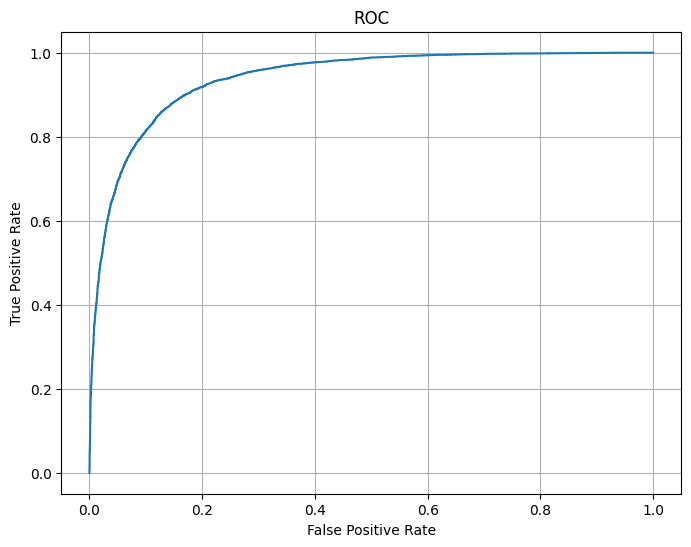

AUC ROC: 0.9386348447999999


In [39]:
#построение ROC-кривой и AUC ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.savefig('roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()
print('AUC ROC:', auc(fpr, tpr))

### 11) Сделали выводы по результатам применения рекуррентной нейронной сети для решения задачи определения тональности текста.  

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Рекуррентная | 184 897                              | 3                        | accuracy:0.8659     ; loss:0.3207     ; AUC ROC:0.9386                                   |


#### Анализируя полученные результаты применения рекуррентной нейронной сети для классификации тональности текстовых отзывов, можно констатировать успешное выполнение поставленной задачи. Достигнутый уровень точности accuracy = 0.8659 существенно превосходит минимально необходимый порог 0.8, что свидетельствует о надежности разработанной модели. Показатель AUC ROC = 0.9386, превышающий значение 0.9, демонстрирует отличную дискриминационную способность модели в различении позитивных и негативных отзывов. Сбалансированные метрики precision и recall (0.87 для обоих классов) указывают на отсутствие значимого смещения в сторону одного из классов, что подтверждает корректность работы алгоритма классификации.